In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.spatial
from matplotlib import pyplot as plt
from sklearn import datasets

In [5]:
class MyKNNRegression:
    def __init__(self, k):
        self.k = k
        self.train_X = None
        self.train_y = None
    
    def fit(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
    
    def predict(self, X):

        difference = np.expand_dims(X, axis=1) - np.expand_dims(self.train_X, axis=0)     
        distance = np.linalg.norm(difference, axis=-1)
        k_nearest = np.argsort(distance, kind = 'heapsort')[:, :self.k]
        distance_to_nearest = self.train_y[k_nearest]
        distx_sorted = np.sort(distance)[:, :self.k]
        sum_kX = np.sum(distx_sorted, axis = 1)
        matrix_y = distance_to_nearest * distx_sorted
        prds = np.mean(matrix_y, axis=-1)
        preds = (prds * self.k) / sum_kX
        return preds

In [6]:
boston = datasets.load_boston()
housing_df = pd.DataFrame(
    data=np.c_[boston['data'], boston['target']],
    columns=list(boston['feature_names']) + ['target']
)
housing_train = housing_df.iloc[:-200].sort_values('LSTAT')
housing_test = housing_df.iloc[-200:].sort_values('LSTAT')

housing_train_X = housing_train.iloc[:, :-1]
housing_train_y = housing_train.iloc[:, -1]

housing_test_X = housing_test.iloc[:, :-1]
housing_test_y = housing_test.iloc[:, -1]

In [7]:
knn_regressor = MyKNNRegression(15)
knn_regressor.fit(housing_train_X.iloc[:, -1:].to_numpy(), housing_train_y.to_numpy())

In [8]:
preds = knn_regressor.predict(housing_test_X.iloc[:, -1:].to_numpy())

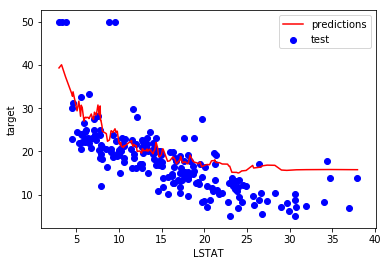

In [9]:
plt.plot(housing_test_X.iloc[:, -1], preds, color='red', label='predictions')
plt.scatter(housing_test_X.iloc[:, -1], housing_test_y, color='blue', label='test')
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.legend()
plt.show()